<a href="https://colab.research.google.com/github/JankaUhrinova/Assessing-Unsupervised-Pretraining-for-improving-prediction-in-Digital-Pathology/blob/main/DCGAN_100K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import tensorflow as tf
import torch.nn.functional as F

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/bakalarka/dataset/"

ADI  BACK  DEB	LYM  MUC  MUS  NORM  STR  train.csv  TUM


In [ ]:
from PIL import Image
import pandas as pd
import os 
from torchvision.io import read_image

The code used to load tiff images on drivei n npz format.


In [ ]:
# image_dataset_dir = "/content/drive/MyDrive/bakalarka/NCT-CRC-HE-100K/NCT-CRC-HE-100K/"
# new_dataset_folder = "/content/drive/MyDrive/bakalarka/dataset"


# dataset = {
#     "image" :[],
#     "label" : []
# }
# for label in os.listdir(image_dataset_dir):
#      images_dir= image_dataset_dir + label
#      print(images_dir)
#      if not os.path.isdir(images_dir):
#         continue
#      for image_file in os.listdir(images_dir):
#         image = Image.open(os.path.join(image_dataset_dir, label, image_file))
#         image = transforms.ToTensor()(image)     
        

#         rel_path = label + "/" + os.path.splitext(image_file)[0] + '.npz'
#         os.makedirs(new_dataset_folder + "/" + label, exist_ok=True)
#         npz_file = os.path.join(new_dataset_folder, rel_path)
#         np.savez(npz_file, image)
#         dataset["image"].append(rel_path)
#         dataset["label"].append(label)

                         
# df = pd.DataFrame(dataset)
# df.to_csv(os.path.join(new_dataset_folder, "train.csv"), index=False)

# print('Dataset converted to npz and saved here at %s '%new_dataset_folder)

# df.head()

In [ ]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize([28,28]),
    #transforms.Normalize((0.5), (0.5)),
    ])

In [ ]:
import torchvision

In [ ]:
class HistopathologyDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
dataset = torchvision.datasets.ImageFolder("/content/drive/MyDrive/bakalarka/NCT-CRC-HE-100K/NCT-CRC-HE-100K/", transform)

In [ ]:
print(len(dataset))

100000


In [ ]:
from torch.utils.data import random_split

In [ ]:
train_data, test_data = random_split(dataset, [80000, 20000])

In [ ]:
print(train_data[0][1])
print(train_data[1][1])
print(train_data[2][1])
print(train_data[3][1])
print(train_data[4][1])
print(test_data[0][1])
print(test_data[1][1])
print(test_data[2][1])
print(test_data[3][1])
print(test_data[4][1])

7
7
0
3
8
4
3
2
7
5


In [ ]:
print(train_data[0][0].size())

torch.Size([3, 28, 28])


tf.Tensor([ 3 28 28], shape=(3,), dtype=int32)


TypeError: ignored

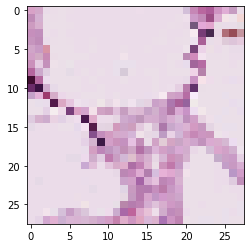

In [ ]:
print(tf.shape(dataset[0][0]))
plt.imshow(plt.imshow(dataset[0][0].permute(1, 2, 0)))